## Short Python cheatsheet

In [1]:
#functions

def func1(param1 = "default1", param2 = "default2"):
    return param1 + param2

print(func1("Hello ","World!"))

#if 
if 1 > 2:
    print("dont beleive")
elif 1 > 3:
    print("beleive even less")
else:
    print("maybe beleive this")

# for loop
for i in range(5):
    print(i)

#list
pets = ["dog","cat", "turtle"]
for my_pet in pets:
    print(my_pet)

Hello World!
maybe beleive this
0
1
2
3
4
dog
cat
turtle


# Qiskit code cheatsheet for the lab



In [2]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_multivector
from qiskit.circuit.library.standard_gates import HGate, XGate, ZGate
import numpy as np

q = QuantumRegister(2,'q') #create a quantum register (q[index] indexing for qbits)
c = ClassicalRegister(2,'c') #create a classical register (c[index] indexing for cbits)

qc = QuantumCircuit(q,c) #create a quantum circuit from the reqisters

#Set state of qubits
state1 = Statevector([0.6,0.8]) #Set statevector
qc.initialize(state1,qubits=q[0], normalize=True) #initialize qubit

#quantum gates
qc.h(q[0]) #H 
qc.x(q[0]) #X 
qc.z(q[0]) #Z 
qc.cx(q[0],q[1]) #CNOT


#Statevector from quantum circuit
state_qc = Statevector(qc)

print(state_qc)

#measurement
qc.measure(q[0],c[0])

#classically controlled quantum gates
ch_gate = HGate().c_if(c[0],1) # controlled H,  gate active if c[0] contains a '1'
qc.append(ch_gate, [q[1]])     # append to circuit, gate will operate on q[1]
cx_gate = XGate().c_if(c[0],1) # controlled X,  gate active if c[0] contains a '1'
qc.append(cx_gate, [q[1]])     # append to circuit, gate will operate on q[1]
cz_gate = ZGate().c_if(c[0],1) # controlled Z,  gate active if c[0] contains a '1'
qc.append(cz_gate, [q[1]])     # append to circuit, gate will operate on q[1]

#alternative way of creating classically controlled circuit parts
with qc.if_test((qc.clbits[0], True)):
    qc.x(q[0])
with qc.if_test((qc.clbits[1], False)):
    qc.z(q[1])

#visual separator
qc.barrier(label = "separation here")

qc.measure(q[1],c[1])
#draw circuit
qc.draw()



Statevector([-0.14142136+0.j,  0.        +0.j,  0.        +0.j,
             -0.98994949+0.j],
            dims=(2, 2))


┌─────────────────────┐┌───┐┌───┐┌───┐     ┌─┐                      »
q_0: ┤ Initialize(0.6,0.8) ├┤ H ├┤ X ├┤ Z ├──■──┤M├──────────────────────»
     └─────────────────────┘└───┘└───┘└───┘┌─┴─┐└╥┘   ┌───┐      ┌───┐   »
q_1: ──────────────────────────────────────┤ X ├─╫────┤ H ├──────┤ X ├───»
                                           └───┘ ║    └─╥─┘      └─╥─┘   »
                                                 ║ ┌────╨────┐┌────╨────┐»
c: 2/════════════════════════════════════════════╩═╡ c_0=0x1 ╞╡ c_0=0x1 ╞»
                                                 0 └─────────┘└─────────┘»
«                 separartion here    
«q_0: ───────────────────░────────────
«        ┌───┐           ░         ┌─┐
«q_1: ───┤ Z ├───────────░─────────┤M├
«        └─╥─┘           ░         └╥┘
«     ┌────╨────┐                   ║ 
«c: 2/╡ c_0=0x1 ╞═══════════════════╩═
«     └─────────┘                   1

In [3]:
from qiskit_aer import Aer
from qiskit import transpile


#set simulator
backend = Aer.get_backend('qasm_simulator')
job_sim = backend.run(transpile(qc, backend), shots=10, memory=True) # 10 repetitions
#get measurement result
result_sim = job_sim.result() 
#get count statistics
counts = result_sim.get_counts()

print(counts) #print counts

#detailed results as a list
mem = result_sim.get_memory() #detailed results

mem_first = [rec[0] for rec in mem] # get results corresponding only to the first qubit
print(mem)
print(mem_first)


{'11': 9, '01': 1}
['11', '01', '11', '11', '11', '11', '11', '11', '11', '11']
['1', '0', '1', '1', '1', '1', '1', '1', '1', '1']


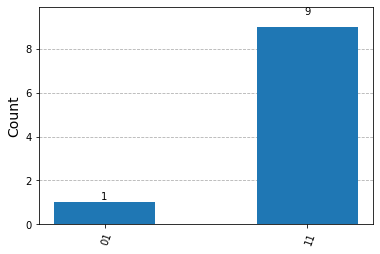

In [4]:
from qiskit.visualization import plot_histogram
#histogram
plot_histogram(counts)


## Example for getting state vectors from simulation

In [5]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit.quantum_info import Statevector
from qiskit_aer import Aer

q = QuantumRegister(2,'q') 
c = ClassicalRegister(2,'c') 

qc = QuantumCircuit(q,c) 
qc.h(q[0]) 
qc.cx(q[0],q[1])

qc.save_statevector(label = 'before_meas', pershot = True)
#measurement
qc.measure(q[0],c[0])
qc.save_statevector(label = 'after_meas', pershot = True)

qc.measure(q[1],c[1])

qc.draw()




┌───┐      before_meas ┌─┐ after_meas    
q_0: ┤ H ├──■────────░──────┤M├─────░─────────
     └───┘┌─┴─┐      ░      └╥┘     ░      ┌─┐
q_1: ─────┤ X ├──────░───────╫──────░──────┤M├
          └───┘      ░       ║      ░      └╥┘
c: 2/════════════════════════╩══════════════╩═
                             0              1

In [6]:
#Trace operation (optional)
#from qiskit.quantum_info import partial_trace

#traced_over_qubits = [qc.qubits.index(qubit) for qubit in range(0,1)]
#density_matrix = partial_trace(state, traced_over_qubits)


In [7]:
from qiskit_aer import Aer
from qiskit import transpile

#seect simulator
backend = Aer.get_backend('qasm_simulator')
job_sim = backend.run(transpile(qc, backend), shots=10,memory=True) # 10 repetition
#getm easurement results
result_sim = job_sim.result() 

print(result_sim.data(0)['before_meas'])
print(result_sim.data(0)['after_meas'])

[Statevector([0.70710678+0.j, 0.        +0.j, 0.        +0.j,
             0.70710678+0.j],
            dims=(2, 2)), Statevector([0.70710678+0.j, 0.        +0.j, 0.        +0.j,
             0.70710678+0.j],
            dims=(2, 2)), Statevector([0.70710678+0.j, 0.        +0.j, 0.        +0.j,
             0.70710678+0.j],
            dims=(2, 2)), Statevector([0.70710678+0.j, 0.        +0.j, 0.        +0.j,
             0.70710678+0.j],
            dims=(2, 2)), Statevector([0.70710678+0.j, 0.        +0.j, 0.        +0.j,
             0.70710678+0.j],
            dims=(2, 2)), Statevector([0.70710678+0.j, 0.        +0.j, 0.        +0.j,
             0.70710678+0.j],
            dims=(2, 2)), Statevector([0.70710678+0.j, 0.        +0.j, 0.        +0.j,
             0.70710678+0.j],
            dims=(2, 2)), Statevector([0.70710678+0.j, 0.        +0.j, 0.        +0.j,
             0.70710678+0.j],
            dims=(2, 2)), Statevector([0.70710678+0.j, 0.        +0.j, 0.        +0.j,
  

# Laboratory exercises

### 1. Create circuits to create the four famous Bell states! Create a circuit to create an entanglement of three quantum bits!

### 2. Create the protocol for superdense coding! Verify correct operation!

In [8]:
superdense_message = [0,1]

#Hint:
#Since Qiskit doesnt support setting classical registers directly, there are two recommended ways of setting the meassage:
# 1. Create a new quantum circuit for each message depending on the message
# 2. Use classically controlled quantum gates, and set the cbits by measuring |0> or |1> depending on the message

### 3. Create a quantum teleportation protocol! Verify correct operation!

In [9]:
state_to_teleport = Statevector([0.6,0.8])

### 4. Create a quantum random number generator! Create the BB84 protocol! Verify correct operation by generating a secret key of at least 20 bits!
(Bonus task: Insert an attacker into the system and detect him!)